In [121]:
import csv
import datetime
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")
import json
import ast
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import pickle
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


In [122]:
def fillClassValueByThreeGroup(data):
    for i in data['vote_average'].index:
        if(0<=data['vote_average'][i]<5):
            data.loc[i,'vote_average']=1
        elif (5<=data['vote_average'][i]<8):
            data.loc[i,'vote_average']=2
        elif (8<=data['vote_average'][i]<=10):
            data.loc[i,'vote_average']=3
        else:    
            data.loc[i,'vote_average']=5
    return data              

In [123]:
def fillClassValueByFourGroup(data):
    for i in data['vote_average'].index:
        if(0<=data['vote_average'][i]<3):
            data.loc[i,'vote_average']=1
        elif (3<=data['vote_average'][i]<5):
            data.loc[i,'vote_average']=2
        elif (5<=data['vote_average'][i]<7):
            data.loc[i,'vote_average']=3
        elif (7<=data['vote_average'][i]<=10):
            data.loc[i,'vote_average']=4
        else:    
            data.loc[i,'vote_average']=5
    return data              

In [124]:
def fillClassValueByTwoGroup(data):
    for i in data['vote_average'].index:
        if(0<=data['vote_average'][i]<5):
            data.loc[i,'vote_average']=1
        elif (5<=data['vote_average'][i]<=10):
            data.loc[i,'vote_average']=2
        else:    
            data.loc[i,'vote_average']=5
    return data              

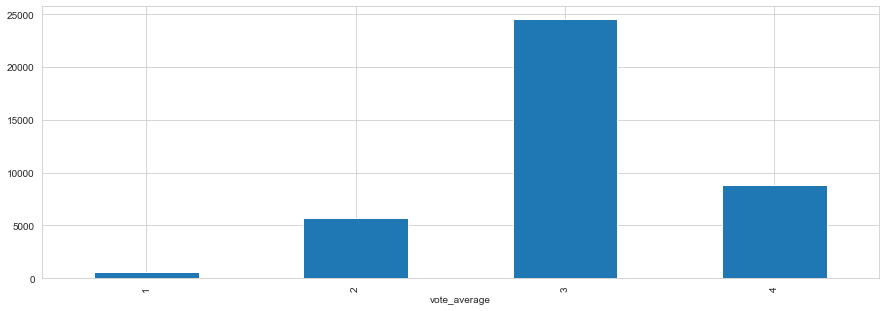

In [60]:
data = pd.read_csv('after_preprocessing_steps.csv') 
data.drop( "Unnamed: 0", inplace = True, axis = 1 )
data.drop( "status", inplace = True, axis = 1 )
data.reset_index(drop=True, inplace=True)

fillClassValueByFourGroup(data)
group_of_class = data.groupby([data['vote_average']])['vote_average'].count()
group_of_class.plot(kind='bar',figsize=(15,5),legend=None)

#preprocessing for numeric features
def normalizeForNumericFeatures(data,column):
    max_value = data[column].max()
    min_value = data[column].min()
    for i in range(len(data)):
        data.loc[i,column]=(data.loc[i,column] - min_value) / (max_value - min_value)
normalizeForNumericFeatures(data,'release_date')        
data['genres']=data['genres'].astype(object)
pd.get_dummies(data)
y = np.array(data['vote_average'])
data.drop( "vote_average", inplace = True, axis = 1 ) 
data.reset_index(drop=True, inplace=True)
X = np.array(data)

In [61]:
#train 4 class labels result
target_names = ['class 0', 'class 1', 'class 2', 'class 3']

def LogRegression(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=200,penalty='l2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("LogisticRegression Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print ("LogisticRegression Precision:", precision_score(y_test, y_pred, average='micro'))
    #print ("LogisticRegression Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("LogisticRegression Classification Result:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    

def Svm(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = svm.SVC()
    model.fit(X_train,y_train)
    svm_predictions = model.predict(X_test)
    #_pickle_it(model,"svm_thre1")
    print('SVM',accuracy_score(y_test,svm_predictions)*100)
    #print ("SVM Precision:", precision_score(y_test, svm_predictions, average='micro'))
    #print ("SVM Recall:", recall_score(y_test, svm_predictions, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, svm_predictions, target_names=target_names))

def naiveBayes(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = BernoulliNB()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('naive bayes accuracy:',accuracy_score(y_test,predictions)*100)
    #print ("naiveBayes Precision:", precision_score(y_test, predictions, average='micro'))
    #print ("naiveBayes Recall:", recall_score(y_test, predictions, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, predictions, target_names=target_names))
    
    
def randomForest(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    rfc = RandomForestClassifier(n_estimators=100, max_features=5)
    rfc = rfc.fit(X_train,y_train)
    y_pred3 = rfc.predict(X_test)
    print(confusion_matrix(y_test, y_pred3))
    print("randomForest Accuracy:",metrics.accuracy_score(y_test, y_pred3))
    #print ("randomForest Precision:", precision_score(y_test, y_pred3, average='micro'))
    #print ("randomForest Recall:", recall_score(y_test, y_pred3, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred3, target_names=target_names))
        
def knn(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print ("KNN Precision:", precision_score(y_test, y_pred, average='micro'))
    #print ("KNN Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred, target_names=target_names))

def gradientBoosting(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    sgb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    sgb = sgb.fit(X_train,y_train)
    y_pred5 = sgb.predict(X_test)
    y_pred_prob = sgb.predict_proba(X_test)[:,1]
    print(confusion_matrix(y_test, y_pred5))
    print("gradientBoosting Accuracy:",metrics.accuracy_score(y_test, y_pred5))
    #print ("gradientBoosting Precision:", precision_score(y_test, y_pred5, average='micro'))
    #print ("gradientBoosting Recall:", recall_score(y_test, y_pred5, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred5, target_names=target_names))
    
LogRegression(X,y)
Svm(X,y)
naiveBayes(X,y)
randomForest(X,y)
knn(X,y)
gradientBoosting(X,y)

[[   0    0  179    1]
 [   0    0 1704    5]
 [   0    0 7277   67]
 [   0    0 2578   91]]
LogisticRegression Accuracy: 0.6190556209040498
LogisticRegression Classification Result:
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       180
     class 1       0.00      0.00      0.00      1709
     class 2       0.62      0.99      0.76      7344
     class 3       0.55      0.03      0.06      2669

    accuracy                           0.62     11902
   macro avg       0.29      0.26      0.21     11902
weighted avg       0.51      0.62      0.49     11902

SVM 61.99798353217947
Classification Result:
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       180
     class 1       0.00      0.00      0.00      1709
     class 2       0.62      1.00      0.76      7344
     class 3       0.67      0.03      0.05      2669

    accuracy                           0.62     11902
   macro av

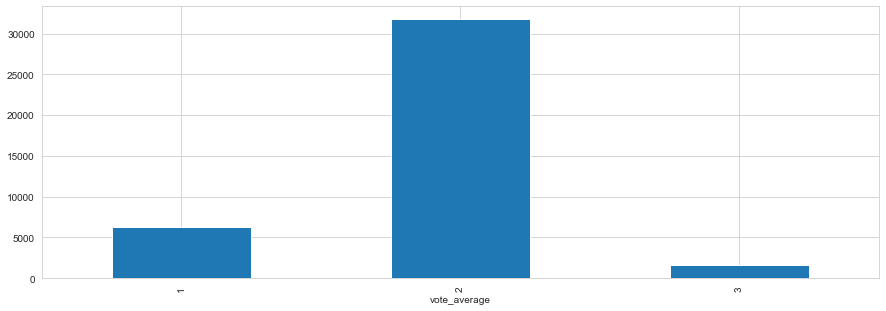

In [125]:
data = pd.read_csv('after_preprocessing_steps.csv') 
data.drop( "Unnamed: 0", inplace = True, axis = 1 )
data.drop( "status", inplace = True, axis = 1 )
data.reset_index(drop=True, inplace=True)

fillClassValueByThreeGroup(data)
group_of_class = data.groupby([data['vote_average']])['vote_average'].count()
group_of_class.plot(kind='bar',figsize=(15,5),legend=None)

#preprocessing for numeric features
def normalizeForNumericFeatures(data,column):
    max_value = data[column].max()
    min_value = data[column].min()
    for i in range(len(data)):
        data.loc[i,column]=(data.loc[i,column] - min_value) / (max_value - min_value)
normalizeForNumericFeatures(data,'release_date')        
data['genres']=data['genres'].astype(object)
pd.get_dummies(data)
y = np.array(data['vote_average'])
data.drop( "vote_average", inplace = True, axis = 1 ) 
data.reset_index(drop=True, inplace=True)
X = np.array(data)

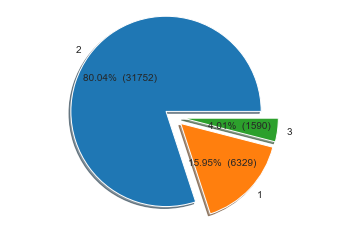

In [42]:
def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')
plot_pie(y)    

In [43]:
#train 3 class labels result

target_names = ['class 0', 'class 1', 'class 2']

def LogRegression(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=200,penalty='l2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("LogisticRegression Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print ("LogisticRegression Precision:", precision_score(y_test, y_pred, average='micro'))
    #print ("LogisticRegression Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("LogisticRegression Classification Result:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    

def Svm(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = svm.SVC()
    model.fit(X_train,y_train)
    svm_predictions = model.predict(X_test)
    #_pickle_it(model,"svm_thre1")
    print('SVM',accuracy_score(y_test,svm_predictions)*100)
    #print ("SVM Precision:", precision_score(y_test, svm_predictions, average='micro'))
    #print ("SVM Recall:", recall_score(y_test, svm_predictions, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, svm_predictions, target_names=target_names))

def naiveBayes(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = BernoulliNB()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('naive bayes accuracy:',accuracy_score(y_test,predictions)*100)
    #print ("naiveBayes Precision:", precision_score(y_test, predictions, average='micro'))
    #print ("naiveBayes Recall:", recall_score(y_test, predictions, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, predictions, target_names=target_names))
    
    
def randomForest(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    rfc = RandomForestClassifier(n_estimators=100, max_features=5)
    rfc = rfc.fit(X_train,y_train)
    y_pred3 = rfc.predict(X_test)
    print(confusion_matrix(y_test, y_pred3))
    print("randomForest Accuracy:",metrics.accuracy_score(y_test, y_pred3))
    #print ("randomForest Precision:", precision_score(y_test, y_pred3, average='micro'))
    #print ("randomForest Recall:", recall_score(y_test, y_pred3, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred3, target_names=target_names))
        
def knn(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print ("KNN Precision:", precision_score(y_test, y_pred, average='micro'))
    #print ("KNN Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred, target_names=target_names))

def gradientBoosting(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    sgb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    sgb = sgb.fit(X_train,y_train)
    y_pred5 = sgb.predict(X_test)
    y_pred_prob = sgb.predict_proba(X_test)[:,1]
    print(confusion_matrix(y_test, y_pred5))
    print("gradientBoosting Accuracy:",metrics.accuracy_score(y_test, y_pred5))
    #print ("gradientBoosting Precision:", precision_score(y_test, y_pred5, average='micro'))
    #print ("gradientBoosting Recall:", recall_score(y_test, y_pred5, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred5, target_names=target_names))
    
LogRegression(X,y)
Svm(X,y)
naiveBayes(X,y)
randomForest(X,y)
knn(X,y)
gradientBoosting(X,y)

[[   0 1889    0]
 [   0 9546    0]
 [   0  467    0]]
LogisticRegression Accuracy: 0.8020500756175433
LogisticRegression Classification Result:
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1889
     class 1       0.80      1.00      0.89      9546
     class 2       0.00      0.00      0.00       467

    accuracy                           0.80     11902
   macro avg       0.27      0.33      0.30     11902
weighted avg       0.64      0.80      0.71     11902

SVM 80.21340951100655
Classification Result:
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1889
     class 1       0.80      1.00      0.89      9546
     class 2       0.67      0.00      0.01       467

    accuracy                           0.80     11902
   macro avg       0.49      0.33      0.30     11902
weighted avg       0.67      0.80      0.71     11902

naive bayes accuracy: 80.20500756175433
Classifi

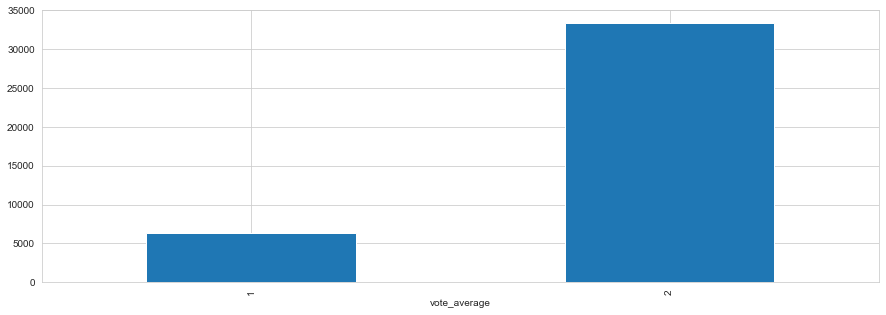

In [63]:
data = pd.read_csv('after_preprocessing_steps.csv') 
data.drop( "Unnamed: 0", inplace = True, axis = 1 )
data.drop( "status", inplace = True, axis = 1 )
data.reset_index(drop=True, inplace=True)

fillClassValueByTwoGroup(data)
group_of_class = data.groupby([data['vote_average']])['vote_average'].count()
group_of_class.plot(kind='bar',figsize=(15,5),legend=None)

#preprocessing for numeric features
def normalizeForNumericFeatures(data,column):
    max_value = data[column].max()
    min_value = data[column].min()
    for i in range(len(data)):
        data.loc[i,column]=(data.loc[i,column] - min_value) / (max_value - min_value)
normalizeForNumericFeatures(data,'release_date')        
data['genres']=data['genres'].astype(object)
pd.get_dummies(data)
y = np.array(data['vote_average'])
data.drop( "vote_average", inplace = True, axis = 1 ) 
data.reset_index(drop=True, inplace=True)
X = np.array(data)

In [64]:
#train 2 class
target_names = ['class 0', 'class 1']

def LogRegression(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=200,penalty='l2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("LogisticRegression Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print ("LogisticRegression Precision:", precision_score(y_test, y_pred, average='micro'))
    #print ("LogisticRegression Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("LogisticRegression Classification Result:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    

def Svm(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = svm.SVC()
    model.fit(X_train,y_train)
    svm_predictions = model.predict(X_test)
    #_pickle_it(model,"svm_thre1")
    print('SVM',accuracy_score(y_test,svm_predictions)*100)
    #print ("SVM Precision:", precision_score(y_test, svm_predictions, average='micro'))
    #print ("SVM Recall:", recall_score(y_test, svm_predictions, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, svm_predictions, target_names=target_names))

def naiveBayes(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = BernoulliNB()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('naive bayes accuracy:',accuracy_score(y_test,predictions)*100)
    #print ("naiveBayes Precision:", precision_score(y_test, predictions, average='micro'))
    #print ("naiveBayes Recall:", recall_score(y_test, predictions, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, predictions, target_names=target_names))
    
    
def randomForest(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    rfc = RandomForestClassifier(n_estimators=100, max_features=5)
    rfc = rfc.fit(X_train,y_train)
    y_pred3 = rfc.predict(X_test)
    print(confusion_matrix(y_test, y_pred3))
    print("randomForest Accuracy:",metrics.accuracy_score(y_test, y_pred3))
    #print ("randomForest Precision:", precision_score(y_test, y_pred3, average='micro'))
    #print ("randomForest Recall:", recall_score(y_test, y_pred3, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred3, target_names=target_names))
        
def knn(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print ("KNN Precision:", precision_score(y_test, y_pred, average='micro'))
    #print ("KNN Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred, target_names=target_names))

def gradientBoosting(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    sgb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    sgb = sgb.fit(X_train,y_train)
    y_pred5 = sgb.predict(X_test)
    y_pred_prob = sgb.predict_proba(X_test)[:,1]
    print(confusion_matrix(y_test, y_pred5))
    print("gradientBoosting Accuracy:",metrics.accuracy_score(y_test, y_pred5))
    #print ("gradientBoosting Precision:", precision_score(y_test, y_pred5, average='micro'))
    #print ("gradientBoosting Recall:", recall_score(y_test, y_pred5, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred5, target_names=target_names))
    
LogRegression(X,y)
Svm(X,y)
naiveBayes(X,y)
randomForest(X,y)
knn(X,y)
gradientBoosting(X,y)

[[    0  1889]
 [    0 10013]]
LogisticRegression Accuracy: 0.8412871786254411
LogisticRegression Classification Result:
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1889
     class 1       0.84      1.00      0.91     10013

    accuracy                           0.84     11902
   macro avg       0.42      0.50      0.46     11902
weighted avg       0.71      0.84      0.77     11902

SVM 84.12871786254411
Classification Result:
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1889
     class 1       0.84      1.00      0.91     10013

    accuracy                           0.84     11902
   macro avg       0.42      0.50      0.46     11902
weighted avg       0.71      0.84      0.77     11902

naive bayes accuracy: 84.12871786254411
Classification Result:
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1889
     cla

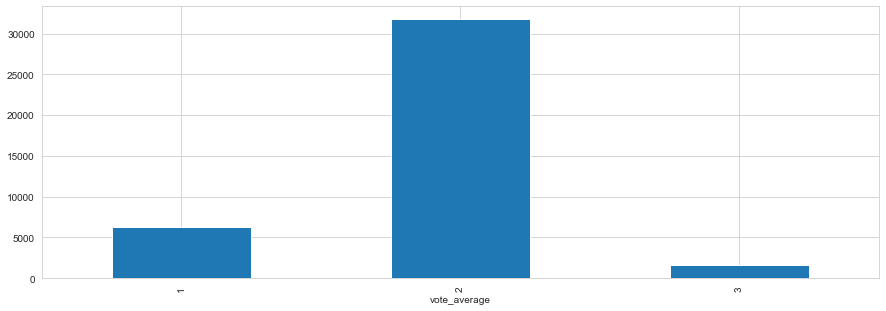

In [65]:
# 3 sınıf etiketi ile veriyi dengeli hale getirmeye calisip basari ölcülmesi:
data = pd.read_csv('after_preprocessing_steps.csv') 
data.drop( "Unnamed: 0", inplace = True, axis = 1 )
data.drop( "status", inplace = True, axis = 1 )
data.reset_index(drop=True, inplace=True)

fillClassValueByThreeGroup(data)
group_of_class = data.groupby([data['vote_average']])['vote_average'].count()
group_of_class.plot(kind='bar',figsize=(15,5),legend=None)

#preprocessing for numeric features
def normalizeForNumericFeatures(data,column):
    max_value = data[column].max()
    min_value = data[column].min()
    for i in range(len(data)):
        data.loc[i,column]=(data.loc[i,column] - min_value) / (max_value - min_value)
normalizeForNumericFeatures(data,'release_date')        
data['genres']=data['genres'].astype(object)
pd.get_dummies(data)
y = np.array(data['vote_average'])
data.drop( "vote_average", inplace = True, axis = 1 ) 
data.reset_index(drop=True, inplace=True)
X = np.array(data)

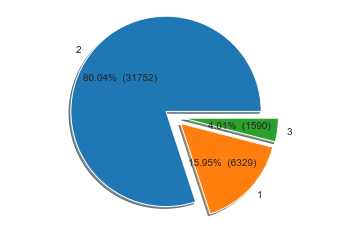

In [66]:
plot_pie(y)    

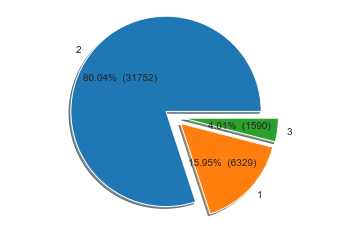

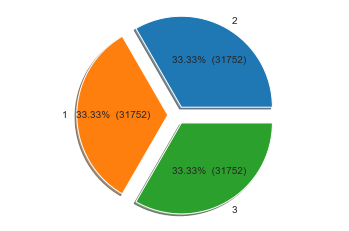

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_sample(X, y)
plot_pie(y)
plot_pie(Y_res)


In [85]:
#train 3 class labels result for after SMOTE

target_names = ['class 0', 'class 1', 'class 2']

def LogRegression(X_train,X_test,y_train,y_test):
    model = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=200,penalty='l2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("LogisticRegression Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print ("LogisticRegression Precision:", precision_score(y_test, y_pred, average='micro'))
    #print ("LogisticRegression Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("LogisticRegression Classification Result:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    

def Svm(X_train,X_test,y_train,y_test):
    model = svm.SVC()
    model.fit(X_train,y_train)
    svm_predictions = model.predict(X_test)
    #_pickle_it(model,"svm_thre1")
    print('SVM',accuracy_score(y_test,svm_predictions)*100)
    #print ("SVM Precision:", precision_score(y_test, svm_predictions, average='micro'))
    #print ("SVM Recall:", recall_score(y_test, svm_predictions, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, svm_predictions, target_names=target_names))

def naiveBayes(X_train,X_test,y_train,y_test):
    model = BernoulliNB()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('naive bayes accuracy:',accuracy_score(y_test,predictions)*100)
    #print ("naiveBayes Precision:", precision_score(y_test, predictions, average='micro'))
    #print ("naiveBayes Recall:", recall_score(y_test, predictions, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, predictions, target_names=target_names))
    
    
def randomForest(X_train,X_test,y_train,y_test):
    rfc = RandomForestClassifier(n_estimators=100, max_features=5)
    rfc = rfc.fit(X_train,y_train)
    y_pred3 = rfc.predict(X_test)
    print(confusion_matrix(y_test, y_pred3))
    print("randomForest Accuracy:",metrics.accuracy_score(y_test, y_pred3))
    #print ("randomForest Precision:", precision_score(y_test, y_pred3, average='micro'))
    #print ("randomForest Recall:", recall_score(y_test, y_pred3, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred3, target_names=target_names))
        
def knn(X_train,X_test,y_train,y_test):
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print ("KNN Precision:", precision_score(y_test, y_pred, average='micro'))
    #print ("KNN Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred, target_names=target_names))

def gradientBoosting(X_train,X_test,y_train,y_test):
    sgb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    sgb = sgb.fit(X_train,y_train)
    y_pred5 = sgb.predict(X_test)
    y_pred_prob = sgb.predict_proba(X_test)[:,1]
    print(confusion_matrix(y_test, y_pred5))
    print("gradientBoosting Accuracy:",metrics.accuracy_score(y_test, y_pred5))
    #print ("gradientBoosting Precision:", precision_score(y_test, y_pred5, average='micro'))
    #print ("gradientBoosting Recall:", recall_score(y_test, y_pred5, average='weighted'))
    print("Classification Result:")
    print(classification_report(y_test, y_pred5, target_names=target_names))


sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_sample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,test_size=0.3,random_state=42)

LogRegression(X_train,X_test,y_train,y_test)
Svm(X_train,X_test,y_train,y_test)
naiveBayes(X_train,X_test,y_train,y_test)
randomForest(X_train,X_test,y_train,y_test)
knn(X_train,X_test,y_train,y_test)
gradientBoosting(X_train,X_test,y_train,y_test)

[[5389 1712 2432]
 [3009 3830 2681]
 [3635 1356 4533]]
LogisticRegression Accuracy: 0.48122616089862474
LogisticRegression Classification Result:
              precision    recall  f1-score   support

     class 0       0.45      0.57      0.50      9533
     class 1       0.56      0.40      0.47      9520
     class 2       0.47      0.48      0.47      9524

    accuracy                           0.48     28577
   macro avg       0.49      0.48      0.48     28577
weighted avg       0.49      0.48      0.48     28577

SVM 45.98453301606187
Classification Result:
              precision    recall  f1-score   support

     class 0       0.40      0.81      0.54      9533
     class 1       0.61      0.28      0.38      9520
     class 2       0.56      0.29      0.38      9524

    accuracy                           0.46     28577
   macro avg       0.52      0.46      0.43     28577
weighted avg       0.52      0.46      0.43     28577

naive bayes accuracy: 33.31350386674599
Classif

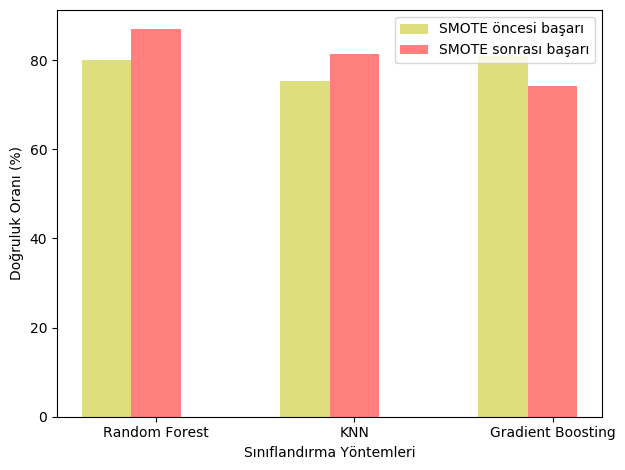

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot

n_groups = 3
accuracy_before_smote = (80.15, 75.41, 80.88)
accuracy_after_smote = (86.93, 81.48, 74.29)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.5

rects1 = plt.bar(index, accuracy_before_smote, bar_width,
alpha=opacity,
color='y',
label='SMOTE öncesi başarı')

rects2 = plt.bar(index + bar_width, accuracy_after_smote, bar_width,
alpha=opacity,
color='r',
label='SMOTE sonrası başarı')

plt.xlabel('Sınıflandırma Yöntemleri')
plt.ylabel('Doğruluk Oranı (%)')
plt.xticks(index + bar_width, ('Random Forest', 'KNN', 'Gradient Boosting'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 1, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 1],
    'min_samples_split': [model.best_params_['min_samples_split'] - 1, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 1],
    'n_estimators': [model.best_params_['n_estimators'] - 10, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 10]
}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_Train,Y_Train)

print("Grid")
predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(metrics.accuracy_score(Y_Test,predictionforest))
acc4 = metrics.accuracy_score(Y_Test,predictionforest)

In [133]:
def knn(X_train,X_test,y_train,y_test,n_neighbors):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_sample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,test_size=0.3,random_state=42)

knn(X_train,X_test,y_train,y_test,3)
knn(X_train,X_test,y_train,y_test,5)
knn(X_train,X_test,y_train,y_test,7)
knn(X_train,X_test,y_train,y_test,9)

KNN Accuracy: 0.8148161108583826
KNN Accuracy: 0.7942051299996501
KNN Accuracy: 0.7785281870035343
KNN Accuracy: 0.7666655002274556


In [142]:
def knn(X_train,X_test,y_train,y_test,weights):
    classifier = KNeighborsClassifier(n_neighbors=3,weights=weights)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_sample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,test_size=0.3,random_state=42)

knn(X_train,X_test,y_train,y_test,'uniform')
knn(X_train,X_test,y_train,y_test,'distance')



KNN Accuracy: 0.8148161108583826
KNN Accuracy: 0.8336074465479232


In [144]:
def knn(X_train,X_test,y_train,y_test,p):
    classifier = KNeighborsClassifier(n_neighbors=3,weights='distance',p=p)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_sample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,test_size=0.3,random_state=42)

knn(X_train,X_test,y_train,y_test,1)
knn(X_train,X_test,y_train,y_test,2)




KNN Accuracy: 0.8513839801238758
KNN Accuracy: 0.8336074465479232


In [134]:
def randomForest(X_train,X_test,y_train,y_test,max_features):
    rfc = RandomForestClassifier(n_estimators=100, max_features=max_features)
    rfc = rfc.fit(X_train,y_train)
    y_pred3 = rfc.predict(X_test)
    print("randomForest Accuracy:",metrics.accuracy_score(y_test, y_pred3))

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_sample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,test_size=0.3,random_state=42)


randomForest(X_train,X_test,y_train,y_test,3)
randomForest(X_train,X_test,y_train,y_test,4)
randomForest(X_train,X_test,y_train,y_test,5)
randomForest(X_train,X_test,y_train,y_test,6)

    

randomForest Accuracy: 0.8746894355600658
randomForest Accuracy: 0.872484865451237
randomForest Accuracy: 0.871120131574343
randomForest Accuracy: 0.8644014417188648


In [137]:
def randomForest(X_train,X_test,y_train,y_test,n_estimators):
    rfc = RandomForestClassifier(n_estimators=n_estimators, max_features=3)
    rfc = rfc.fit(X_train,y_train)
    y_pred3 = rfc.predict(X_test)
    print("randomForest Accuracy:",metrics.accuracy_score(y_test, y_pred3))

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_sample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,test_size=0.3,random_state=42)


randomForest(X_train,X_test,y_train,y_test,100)
randomForest(X_train,X_test,y_train,y_test,200)
randomForest(X_train,X_test,y_train,y_test,300)
randomForest(X_train,X_test,y_train,y_test,400)


randomForest Accuracy: 0.8767190397872415
randomForest Accuracy: 0.8744794765020821
randomForest Accuracy: 0.8762291353186129
randomForest Accuracy: 0.8760191762606292
